In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
import tqdm

In [2]:
def get_data():
    file = open('./data/shashlik_61_pulses.txt', 'r')
    data = file.readlines()
    data = np.array([list(map(float, experiment.split())) for experiment in data])
   
    X = data[:, 2:]
    y_baseline = data[:, 1]
    y = data[:, 0]
    
    return X, y

In [3]:
X, y = get_data()

In [108]:
X.shape[0]

7848

In [117]:
print("Error: value tau = %i is too big" % X.shape[0])

Error: value tau = 7848 is too big


In [140]:
def generate_multi_signal(tau, alpha, to_plot=False):
    if tau > X.shape[1]:
        print("Error: value tau = %i is too big" % tau)
    
    first_signal = X[np.random.choice(X.shape[0], 1, replace=False)][0]  
    second_signal = X[np.random.choice(X.shape[0], 1, replace=False)][0]

    second_signal = np.concatenate([[second_signal[0]]*tau, second_signal[:-tau]])
    
    first_signal -= np.max(first_signal)
    second_signal -= np.max(second_signal)
    
    plt.plot(first_signal)
    plt.plot(second_signal)
    plt.plot(first_signal/alpha + second_signal)
    plt.legend(['First signal', 'Second signal', 'Sum of signals'])
    plt.show()
    
    return first_signal/alpha + second_signal

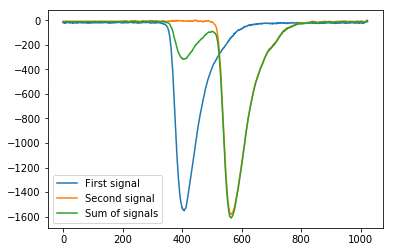

In [139]:
generate_multi_signal(200, 5, to_plot=True)